# 1. 数据生成

假设真实的房价 y 与房屋面积 x 存在线性关系 (y = 2x + 1 + $\epsilon$)，其中 $\epsilon$ 是服从均值为 0，方差为 $0.5^2$ 的正态分布噪声（代表房屋价格中不可预测的因素，如房屋的特殊装修、周边环境的偶然因素等 ） 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 设置随机种子，保证结果可复现
np.random.seed(42)

# 真实函数: y = 2x + 1
def true_function(x):
    return 2 * x + 1

# 生成带固定噪声的数据
def generate_data(x, noise_values):
    return true_function(x) + noise_values

# 实验参数
n_samples = 100        # 每个数据集的样本量
n_loops = 1000         # 测试轮数
x_test = np.array([2]) # 测试点
noise_level = 0.5      # 噪声标准差

# 生成测试点的真实值
y_true = true_function(x_test)

# 为所有数据集预先生成固定的噪声值
noise_values_per_dataset = np.random.normal(0, noise_level, size=(n_loops, n_samples))
noise_values_test = np.random.normal(0, noise_level, size=n_loops)

# 为每个数据集训练模型并预测
all_predictions = []
all_mse = []
all_tests = []

for i in range(n_loops):
    # 生成训练数据（使用固定噪声）
    x_train = np.random.uniform(0, 5, size=n_samples).reshape(-1, 1)
    y_train = generate_data(x_train, noise_values_per_dataset[i].reshape(-1, 1))
    
    # 记录测试点的观测值（使用固定噪声）
    y_test = generate_data(x_test, noise_values_test[i])
    all_tests.append(y_test)
    
    # 训练模型
    model = LinearRegression()
    model.fit(x_train, y_train)
    
    # 在测试点上预测
    y_pred = model.predict(x_test.reshape(-1, 1))
    all_predictions.append(y_pred[0])
    
    # 计算并记录MSE
    mse = mean_squared_error([y_test], y_pred)
    all_mse.append(mse)

# 转换为numpy数组
all_predictions = np.array(all_predictions)
all_tests = np.array(all_tests).flatten()
all_mse = np.array(all_mse)



In [75]:
noise_values_per_dataset[:5]

array([[ 0.24835708, -0.06913215,  0.32384427,  0.76151493, -0.11707669,
        -0.11706848,  0.78960641,  0.38371736, -0.23473719,  0.27128002,
        -0.23170885, -0.23286488,  0.12098114, -0.95664012, -0.86245892,
        -0.28114376, -0.50641556,  0.15712367, -0.45401204, -0.70615185,
         0.73282438, -0.11288815,  0.0337641 , -0.71237409, -0.27219136,
         0.05546129, -0.57549679,  0.18784901, -0.30031934, -0.14584687,
        -0.30085331,  0.92613909, -0.00674861, -0.52885546,  0.41127246,
        -0.61042182,  0.1044318 , -0.97983506, -0.66409302,  0.09843062,
         0.36923329,  0.08568414, -0.05782414, -0.15055185, -0.739261  ,
        -0.3599221 , -0.23031939,  0.52856111,  0.17180914, -0.88152008,
         0.16204198, -0.19254114, -0.338461  ,  0.30583814,  0.51549976,
         0.46564006, -0.41960876, -0.15460619,  0.16563172,  0.48777256,
        -0.23958712, -0.09282949, -0.55316749, -0.59810331,  0.40626291,
         0.67812001, -0.03600506,  0.50176645,  0.1

In [74]:
noise_values_per_dataset.shape

(1000, 100)

In [ ]:
all_mse[:5],all_predictions[:5],all_tests[:5]

(array([0.29959845, 0.2962987 , 0.05800948, 0.16412948, 0.02378272]),
 array([[4.96794142],
        [4.96665588],
        [5.04686703],
        [5.09550974],
        [4.99051507]]),
 array([5.51529729, 4.42232262, 5.2877186 , 4.69038077, 4.8362986 ]))

In [ ]:
all_mse.shape,all_predictions.shape,all_tests.shape

((1000,), (1000, 1), (1000,))

测试点 x = 2
真实值: 5.000000
预测值的均值: 5.001119

四个误差指标:
1. 偏差 (Bias): 0.001119
2. 方差 (Variance): 0.003078
3. 噪声 (Noise): 0.242407 (理论值: 0.250000)
4. 直接计算的 MSE: 0.245512
5. 分解计算的 MSE (Bias² + Variance + Noise): [0.24548593]

两者差异: [2.59656544e-05]


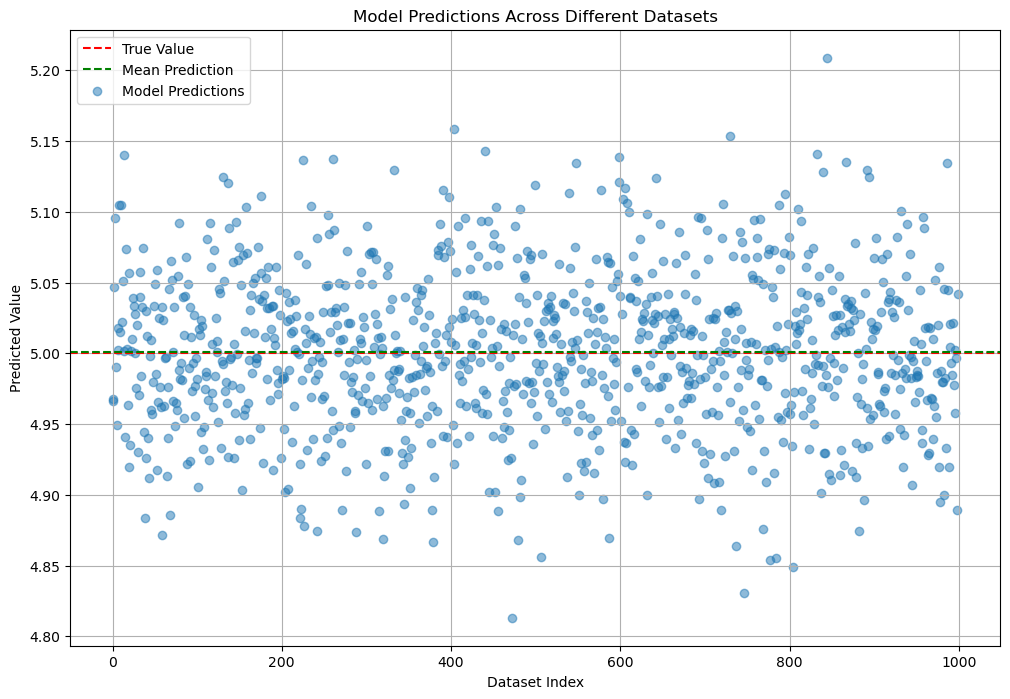

In [77]:
# 计算偏差、方差、噪声和MSE
bias = np.mean(all_predictions) - y_true
variance = np.var(all_predictions)
noise = np.var(noise_values_test)  # 使用实际噪声值的方差
mse_direct = np.mean((all_predictions - all_tests) ** 2)
mse_decomposition = bias ** 2 + variance + noise

# 打印结果
print(f"测试点 x = {x_test[0]}")
print(f"真实值: {y_true[0]:.6f}")
print(f"预测值的均值: {np.mean(all_predictions):.6f}")
print("\n四个误差指标:")
print(f"1. 偏差 (Bias): {bias[0]:.6f}")
print(f"2. 方差 (Variance): {variance:.6f}")
print(f"3. 噪声 (Noise): {noise:.6f} (理论值: {noise_level**2:.6f})")
print(f"4. 直接计算的 MSE: {mse_direct:.6f}")
print(f"5. 分解计算的 MSE (Bias² + Variance + Noise): {mse_decomposition}")
print(f"\n两者差异: {abs(mse_direct - mse_decomposition)}")

# 可视化预测结果
plt.figure(figsize=(12, 8))
plt.axhline(y=y_true, color='r', linestyle='--', label='True Value')
plt.axhline(y=np.mean(all_predictions), color='g', linestyle='--', label='Mean Prediction')
plt.scatter(range(n_datasets), all_predictions, alpha=0.5, label='Model Predictions')
plt.title('Model Predictions Across Different Datasets')
plt.xlabel('Dataset Index')
plt.ylabel('Predicted Value')
plt.legend()
plt.grid(True)
plt.show()